# term1_sprint5 SVMスクラッチ

## 2.SVMスクラッチ

分類のためのサポートベクターマシン（SVM、サポートベクトルマシン）のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


SVMには学習時に分類の間違いを認めるソフトマージンSVMと、認めないハードマージンSVMがありますが、ここでは実装が単純なハードマージンSVMを扱います。


以下に雛形を用意してあります。このScratchSVMClassifierクラスにコードを書き加えていってください。



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# ベースデータ
X = np.array([[1,2],[3,4],[5,6],[7,8],[9,10]])
print(f'X.shape:{X.shape}')
print(f'X:{X}')
             
y = np.array([1, -1, 1, -1, 1])
y = y.reshape(-1, 1)
             
print(f'y.shape:{y.shape}')
print(f'y:{y}')

# X_test print(f'X_tt.shape:{X_tt.shape}') print(f'type(X_tt):{type(X_tt)}')
X_tt = np.arange(10, 0, -1).reshape(-1, 2)
print(f'X_tt:{X_tt}')

X.shape:(5, 2)
X:[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]
y.shape:(5, 1)
y:[[ 1]
 [-1]
 [ 1]
 [-1]
 [ 1]]
X_tt:[[10  9]
 [ 8  7]
 [ 6  5]
 [ 4  3]
 [ 2  1]]


In [62]:
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル
    """
    def _kernel(self, X):
        k = np.dot(X, X.T)
        return k

    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples,)
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples,)
            検証データの正解値
        """
        self.X_ = np.concatenate([np.ones((X.shape[0],1)), X], axis=1)
        self.y_ = y.reshape(len(y),1)
        
        np.random.seed(seed=1)
        self.lamda_ = np.random.rand(self.X_.shape[0], 1) *00.1
#         self.lamda = np.array([8,3,5,9,1])
        self.lamda_new = self.lamda_.copy()
        if self.kernel == "linear":
            self.k = self._kernel(self.X_)
            
        for i in range(self.iter):
            self._gradient_descent()
        
#         print("lam",self.lamda)
#         print("lam_n",self.lamda_new)
#         print("X",self.X)
#         print("y",y)
#         print(y.T)
#         print("y",self.y)
        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print(self.support_vec_index)
            print(self.support_vec)
            print(self.support_vec_n)
            
    def _gradient_descent(self):
        """
        最急降下法により、次回の線形モデル値を算出する。(訓練データ専用)
        Parameters
        ----------
        k : 次の形のndarray, shape (n_samples, 1)
            xの総和
        Attributes
        ----------
        self.lamda_sv_index: 次の形のndarray,shape(n)
          サポートベクターのインデックス
        self.lamda_sv : 次の形のndarray,shape(n)
          サポートベクターの値
        self.lamda_sv_n : int
          サポートベクターの数
          """
        delta = self.y_ * np.dot(self.k.T, self.lamda_*self.y_)
        self.lamda_new += self.lr*(1-delta)
        self.lamda_new = np.where(self.lamda_new < 0, 0, self.lamda_new)
        
#         print("delta",delta)

#         print("s",self.lamda_new)
#         print("p",self.lamda_new)

        self.support_vec_index = np.where(self.lamda_new > self.threshold)[0]
        self.support_vec = self.X_[self.support_vec_index]
        self.support_vec_n = len(self.support_vec)

    def predict(self, X_test):
        """
        SVM分類器を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        # 富永氏サンプル--------------------------
#         sample = [0,2,3]
#         lam_s = np.array([[11.19],[8.19],[12.19]])
#         a = (lam_s * self.y0[sample])
#         k = np.dot(self.X[sample], X_test.T)
#         aT = a.T
#         fx = np.dot(aT, k)
    
#         print("lam_s",lam_s)
#         print("ys",self.y0[sample])
#         print("a",a)
#         print("Xsam",self.X[sample])
#         print("X_test.T",X_test.T)     
#         print("k",k)
#         print("aT",aT)
#         print("fx",fx)
        # -------------------------------------
    
        X_p = np.concatenate([np.ones((X.shape[0],1)), X], axis=1)
        self.k_p = np.dot(X_p, self.support_vec.T)
        f = np.dot(self.k_p, self.lamda_new[self.support_vec_index]*self.y_[self.support_vec_index])
        f = f.reshape(len(f))
        f = np.where(f > 0, 1, -1)
        return f

In [56]:
# ランダムフォレストのパラメーター
SSVM_grid = ScratchSVMClassifier{"num_iter": [i for i in range(1, 50)],
                                       "lr": [i for i in range(0.08, 1)]
                                      }
max_score = 0
SearchMethod = 0

#ランダムフォレストの実行
for model, param in tqdm(SSVM_grid.items()):
    clf = GridSearchCV(model, param)
    clf.fit(X_train,  Y_train)
    Y_pred = clf.predict(X_test)
    score = f1_score(Y_test, Y_pred, average="micro")

    if max_score < score:
        max_score = score
        best_param = clf.best_params_
        best_model = model.__class__.__name__

print("ベストスコア:{}".format(max_score))
print("モデル:{}".format(best_model))
print("パラメーター:{}".format(best_param))

SyntaxError: invalid syntax (<ipython-input-56-a35d9b78c6a1>, line 2)

In [66]:
SSVM = ScratchSVMClassifier(num_iter=3, lr=0.01, kernel='linear', threshold=1e-3, verbose=True)
SSVM.fit(X_train, y_train)

[]
[]
0


In [52]:
SSVM.predict(X_test)

array([-1, -1, -1, -1, -1])

In [12]:
# シンプルデータセット1作成コード
import numpy as np
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X_d = np.concatenate((f0, f1))
y_d = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X_d = X_d[random_index]
y_d = y_d[random_index]

In [6]:
# 分割
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_d, y_d, train_size=0.8, shuffle = True,  random_state=0)
print(f"X_trainの訓練データ: {X_train.shape[0]} X_trainの特微量: {X_train.shape[1]} X_trainの値: {X_train[0]}")
print(f"X_testの訓練データ : {X_test.shape[0]} X_testの特微量 : {X_test.shape[1]} X_testの値 : {X_test[0]}")
print(f"y_trainの訓練データ: {len(y_train)} X_trainの特微量: 1 y_train値(10個): {y_train[:10]}")
print(f"y_testの訓練データ : {len(y_test)} X_testの特微量 : 1 y_testの値（10個）: {y_test[:10]}")

X_trainの訓練データ: 400 X_trainの特微量: 2 X_trainの値: [ 3.28429301 -0.51454156]
X_testの訓練データ : 100 X_testの特微量 : 2 X_testの値 : [3.63463384 0.82664981]
y_trainの訓練データ: 400 X_trainの特微量: 1 y_train値(10個): [-1  1  1  1 -1  1 -1  1  1  1]
y_testの訓練データ : 100 X_testの特微量 : 1 y_testの値（10個）: [-1  1  1 -1 -1  1  1 -1 -1  1]


In [7]:
# 標準化

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_d) 
X_train_std = scaler.transform(X_train) 
X_test_std = scaler.transform(X_test)
print(f"データ数：{X_train.shape} X_test初期値:{X_test[0]} X_test変換値:{X_test_std[0]}")

データ数：(400, 2) X_test初期値:[3.63463384 0.82664981] X_test変換値:[1.69807496 0.1523444 ]


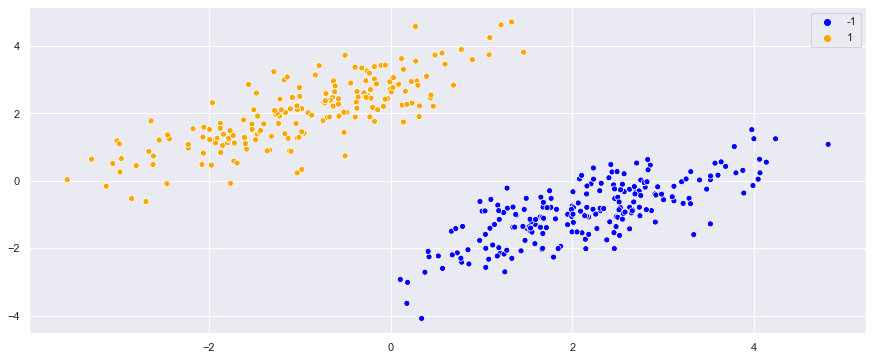

In [8]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1,1,1)

color_dict = dict({-1:'blue',
                   1:'orange',
                   0:'green'})


ax1 = sns.scatterplot(X_train[:,0], X_train[:,1], hue = y_train, palette=color_dict)
# ax1 = sns.scatterplot(X_train[:,1], y_train)
# ax1 = sns.scatterplot("petal_length", "petal_width", data = df, hue = df["target"])

In [ ]:
SSVM.predict(X_test)